In [1]:
import pandas as pd
import numpy as np 
import plotnine as p9
import datetime as dt
import glob

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
activity_data = pd.read_csv('../data/Activities.csv')
activity_data.Date = pd.to_datetime(activity_data.Date)
activity_data['Activity Type'].values 

activity_data.head(2)
activity_data.info()

array(['Trail Running', 'Running', 'Strength Training', 'Running',
       'Walking', 'Running', 'Treadmill Running', 'Indoor Cycling',
       'Virtual Running', 'Resort Skiing/Snowboarding',
       'Strength Training', 'Virtual Running', 'Virtual Running',
       'Strength Training', 'Treadmill Running', 'Running',
       'Resort Skiing/Snowboarding', 'Trail Running',
       'Cross Country Skate Skiing', 'Cross Country Skate Skiing',
       'Strength Training', 'Strength Training', 'Yoga',
       'Strength Training', 'Treadmill Running', 'Strength Training',
       'Strength Training', 'Strength Training', 'Strength Training',
       'Cross Country Skate Skiing', 'Strength Training', 'Walking',
       'Strength Training', 'Treadmill Running', 'Indoor Cycling',
       'Treadmill Running', 'Indoor Cycling', 'Treadmill Running',
       'Running', 'Yoga', 'Yoga', 'Running', 'Running', 'Running',
       'Running', 'Running', 'Running', 'Running', 'Running', 'Running',
       'Running', 'Run

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Resp,Max Resp,Stress Change,Stress Start,Stress End,Avg Stress,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Trail Running,2022-03-05 15:10:01,False,Lebanon Trail Running,2.73,342,00:26:56,138,165,2.6,...,--,--,--,--,--,--,00:26:27,00:31:22,424,800
1,Running,2022-03-02 17:22:53,False,Lebanon Running,2.39,270,00:16:54,152,168,3.2,...,--,--,--,--,--,--,00:16:52,00:18:02,791,919


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Activity Type             60 non-null     object        
 1   Date                      60 non-null     datetime64[ns]
 2   Favorite                  60 non-null     bool          
 3   Title                     60 non-null     object        
 4   Distance                  60 non-null     float64       
 5   Calories                  60 non-null     int64         
 6   Time                      60 non-null     object        
 7   Avg HR                    60 non-null     int64         
 8   Max HR                    60 non-null     int64         
 9   Aerobic TE                60 non-null     float64       
 10  Avg Run Cadence           60 non-null     object        
 11  Max Run Cadence           60 non-null     object        
 12  Avg Pace                

In [3]:
# Subset to 22W
activity_data.Date.max()
activity_data.Date.min()
is_22W = activity_data.Date >= dt.datetime.strptime('2022-01-4', '%Y-%m-%d')
activity_data = activity_data.loc[is_22W, :].copy()
activity_data.Date.max()
activity_data.Date.min()

Timestamp('2022-03-05 15:10:01')

Timestamp('2021-11-07 09:32:07')

Timestamp('2022-03-05 15:10:01')

Timestamp('2022-01-04 09:04:46')

In [4]:
#activity_data.Date.value_counts()
activity_data.head()
activity_values = pd.DataFrame(activity_data['Activity Type'].value_counts())
activity_values.head()
activity_values = activity_values.reset_index()
activity_values['percentage'] = activity_values['Activity Type']/sum(activity_values['Activity Type'])
activity_values
sum(activity_values.loc[activity_values['index'].str.contains('Running'), 'Activity Type'])/sum(activity_values['Activity Type'])

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Resp,Max Resp,Stress Change,Stress Start,Stress End,Avg Stress,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Trail Running,2022-03-05 15:10:01,False,Lebanon Trail Running,2.73,342,00:26:56,138,165,2.6,...,--,--,--,--,--,--,00:26:27,00:31:22,424,800
1,Running,2022-03-02 17:22:53,False,Lebanon Running,2.39,270,00:16:54,152,168,3.2,...,--,--,--,--,--,--,00:16:52,00:18:02,791,919
2,Strength Training,2022-03-01 18:49:10,False,Dumbbell Workout,0.00,293,00:33:24,117,151,1.8,...,--,--,--,--,--,--,00:10:48,00:33:35,--,--
3,Running,2022-02-23 12:15:38,False,Lebanon Running,2.13,235,00:15:07,145,161,3.0,...,--,--,--,--,--,--,00:15:06,00:19:46,738,867
4,Walking,2022-02-18 17:17:21,False,Lebanon Walking,0.78,104,00:14:11,91,108,0.5,...,--,--,--,--,--,--,00:12:45,00:14:11,743,864


,Activity Type
Strength Training,12
Treadmill Running,6
Running,5
Cross Country Skate Skiing,3
Indoor Cycling,3


,index,Activity Type,percentage
0,Strength Training,12,0.292683
1,Treadmill Running,6,0.146341
2,Running,5,0.121951
3,Cross Country Skate Skiing,3,0.073171
4,Indoor Cycling,3,0.073171
5,Yoga,3,0.073171
6,Virtual Running,3,0.073171
7,Resort Skiing/Snowboarding,2,0.048780
8,Walking,2,0.048780
9,Trail Running,2,0.048780


0.3902439024390244

In [5]:
running_data = activity_data.loc[activity_data['Activity Type']==('Running'), :].copy()

In [6]:
def convert_pace(pace_series):
    ret = []
    for pace in pace_series:
        ptemp = pace.split(':')
        min = float(ptemp[0])
        sec = float(ptemp[1])/(60)
        ret.append((min+sec))
    return ret

#running_data['Avg Pace'].describe()
#running_data['Avg Pace'] = convert_pace(running_data['Avg Pace'])
#running_data['Avg Pace'].describe()


        

In [7]:
#activity_data['Avg HR'].describe()
#activity_data['Avg Run Cadence'].where(activity_data['Avg Run Cadence'] != '--', [pd.NA]).dropna().astype('int').describe()
#sum(activity_data['Distance'])

In [8]:
# get the 2021 uds files
training_files = []
training_df = pd.DataFrame()
for file in glob.glob("../data/f4617e72-eb4d-4f9d-8aec-8d965e6f651c_1/DI_CONNECT/DI-Connect-Metrics/Training*.json"):
    if '2021' in file: 
        temp_df = pd.read_json(file)
        training_df = training_df.append(temp_df)


In [9]:
training_df.info()
training_df.calendarDate = pd.to_datetime(training_df.calendarDate)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 136
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   userProfilePK                 685 non-null    int64         
 1   calendarDate                  685 non-null    object        
 2   deviceId                      685 non-null    int64         
 3   timestamp                     685 non-null    datetime64[ns]
 4   sport                         581 non-null    object        
 5   subSport                      581 non-null    object        
 6   weeklyTrainingLoadSum         685 non-null    int64         
 7   loadTunnelMin                 685 non-null    int64         
 8   loadTunnelMax                 685 non-null    int64         
 9   trainingStatus                685 non-null    object        
 10  fitnessLevelTrend             685 non-null    object        
 11  loadLevelTrend                68

In [10]:
training_df.shape
training_df = training_df.loc[training_df.calendarDate >= dt.datetime.strptime('2022-01-4', '%Y-%m-%d'), :]
training_df.shape
training_df.head()


(685, 13)

(95, 13)

,userProfilePK,calendarDate,deviceId,timestamp,sport,subSport,weeklyTrainingLoadSum,loadTunnelMin,loadTunnelMax,trainingStatus,fitnessLevelTrend,loadLevelTrend,trainingStatusFeedbackPhrase
42,5993977,2022-01-04,3313499310,2022-01-04 05:02:52,RUNNING,GENERIC,91,226,484,MAINTAINING,NO_CHANGE,DECREASING,MAINTAINING_AER_LOW_SHORT
43,5993977,2022-01-04,3313499310,2022-01-04 14:37:41,RUNNING,GENERIC,92,226,484,MAINTAINING,NO_CHANGE,DECREASING,MAINTAINING_AER_LOW_SHORT
44,5993977,2022-01-05,3313499310,2022-01-05 05:02:55,RUNNING,GENERIC,92,226,484,MAINTAINING,NO_CHANGE,DECREASING,MAINTAINING_AER_LOW_SHORT
45,5993977,2022-01-05,3313499310,2022-01-05 14:23:50,RUNNING,GENERIC,94,226,484,MAINTAINING,NO_CHANGE,DECREASING,MAINTAINING_AER_LOW_SHORT
46,5993977,2022-01-05,3313499310,2022-01-05 18:00:42,RUNNING,GENERIC,212,226,484,MAINTAINING,NO_CHANGE,INCREASING,MAINTAINING_AER_LOW_SHORT


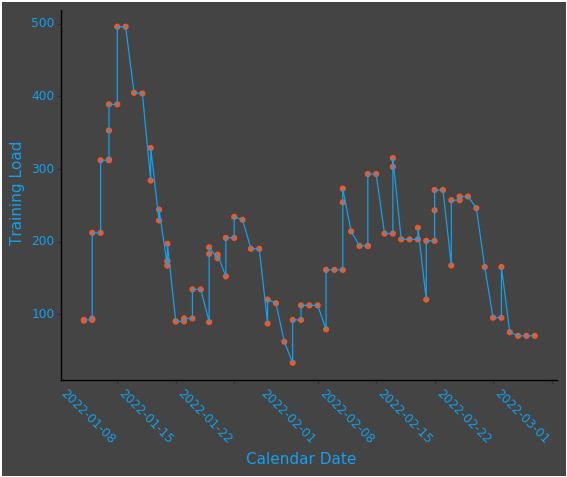

<ggplot: (8786436054129)>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 10 x 10 in image.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: load_long.png


In [11]:
gourdotron_theme = (p9.theme_classic()
                   + p9.theme(axis_text_x = p9.element_text(angle=-45, color='#14a0ec', hjust=1), 
                           axis_text_y = p9.element_text(color='#14a0ec'))
                    + p9.theme(panel_background = p9.element_rect(fill='#444444'), 
                           plot_background = p9.element_rect(fill = "#444444"), 
                           axis_title_x=p9.element_text(color='#14a0ec'), 
                           axis_title_y=p9.element_text(color='#14a0ec')))

load_long = (p9.ggplot(data=training_df, mapping=p9.aes(x='calendarDate', y='weeklyTrainingLoadSum'))
                + p9.geom_point(color='#F85621', fill='#F85621') #stat='identity'
                + p9.labs(x='Calendar Date', y = 'Training Load')
                + p9.geom_line(color='#14a0ec')
                + gourdotron_theme)

load_long
load_long.save("load_long.png", width=10, height=10, dpi=300)